Chapter 19

# 炮弹角度优化
Book_3《数学要素》 | 鸢尾花书：从加减乘除到机器学习 (第二版)

这段代码使用**最小二乘法**拟合了一组模拟的抛物线型散点数据。以下从数学角度详细描述代码的功能、数学公式以及可视化的目的。

---

### 1. **数据生成**

#### 抛物线数据
代码首先生成了一组模拟的散点数据。这些数据符合抛物线的模型形式，并叠加了随机噪声：
$$
y = -0.02x^2 + 2x + 30 + \epsilon
$$
其中，$\epsilon \sim \mathcal{N}(0, \sigma^2)$ 是服从均值为 $0$，标准差为 $\sigma$ 的正态分布的噪声，模拟实际观测中的误差。

- 水平坐标 $x$ 为均匀分布的 $[0, 100]$ 间隔点。
- 随机噪声的加入使得数据更加贴近真实实验场景，反映出观测数据的不确定性。

---

### 2. **目标函数：最小二乘法**

#### 拟合模型
为了拟合上述数据，假设抛物线模型为：
$$
y = ax^2 + bx + c
$$
其中，$a, b, c$ 是需要确定的参数。

#### 最小二乘法
最小二乘法的目标是通过最小化观测值与拟合值之间的误差平方和，找到最优参数。目标函数定义为：
$$
\text{Loss}(a, b, c) = \sum_{i=1}^n \left( y_i - (ax_i^2 + bx_i + c) \right)^2
$$
- $y_i$ 是观测数据；
- $ax_i^2 + bx_i + c$ 是模型的预测值；
- $n$ 是数据点的数量。

代码中的函数 `parabola_obj` 实现了上述目标函数。

#### 优化方法
初始猜测值为 $[-0.1, 1, 1]$，使用 `scipy.optimize.minimize` 进行参数优化。优化算法通过迭代搜索，找到能够最小化目标函数的参数 $a_\text{opt}, b_\text{opt}, c_\text{opt}$。

---

### 3. **拟合结果及公式**

#### 优化后的参数
优化结果返回的参数为：
$$
a_\text{opt}, b_\text{opt}, c_\text{opt}
$$
它们定义了一条拟合的抛物线：
$$
y_\text{fit} = a_\text{opt} x^2 + b_\text{opt} x + c_\text{opt}
$$

#### 数据预测
使用拟合的抛物线模型对原始数据 $x_\text{data}$ 进行预测，得到对应的预测值：
$$
y_\text{data\_predict} = a_\text{opt} x_\text{data}^2 + b_\text{opt} x_\text{data} + c_\text{opt}
$$

---

### 4. **可视化分析**

#### 可视化 1：数据散点图
第一张图展示了原始的散点数据，表现了数据的抛物线趋势以及随机噪声的分布情况。

#### 可视化 2：散点与拟合抛物线
第二张图叠加了优化后的抛物线曲线，展示了拟合模型对数据的整体描述。红色曲线 $y_\text{fit}$ 表示拟合模型，与蓝色散点 $y_\text{data}$ 的匹配情况反映了拟合的效果。

#### 可视化 3：最小二乘误差分析
第三张图进一步可视化了最小二乘法的核心思想：
- 对于每个数据点 $(x_i, y_i)$，绘制其观测值与预测值之间的误差：
  $$\text{误差} = y_i - y_\text{predict}$$
- 误差通过竖线和蓝色阴影矩形标记，矩形面积的大小表示误差平方。

这种可视化清晰地展示了优化过程中的目标，即最小化所有矩形面积的总和（即误差平方和）。

---

### 5. **结论与应用**

这段代码通过最小二乘法成功拟合了一组带噪声的抛物线数据，并通过三种可视化方式直观展示了数据分布、拟合结果和误差分析。最小二乘法的核心是通过优化参数，使模型能够最大限度地描述观测数据，广泛应用于曲线拟合、回归分析等领域。

通过拟合结果可以看出，抛物线模型能够很好地捕捉数据的趋势，同时随机噪声的存在不会显著影响最终模型的描述能力。

## 导入包

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

## 生成抛物线散点数据，开口朝下，减少噪音

In [2]:
np.random.seed(0)
x_data = np.linspace(0, 100, 20)
y_data = -0.02 * x_data**2 + 2 * x_data + 30 + np.random.normal(0, 50, x_data.shape)*0.1

## 最小二乘法的目标函数

In [3]:
def parabola_obj(params, x, y):
    a, b, c = params
    y_pred = a * x**2 + b * x + c
    return np.sum((y - y_pred)**2)

## 初始猜测和优化

In [4]:
initial_guess = [-0.1, 1, 1]
result = minimize(parabola_obj, initial_guess, args=(x_data, y_data))

In [5]:
# 获取拟合的最优化参数
a_opt, b_opt, c_opt = result.x

In [6]:
# 拟合的抛物线
x_fit = np.linspace(0, 100, 100)
y_fit = a_opt * x_fit**2 + b_opt * x_fit + c_opt

## 可视化1：散点图

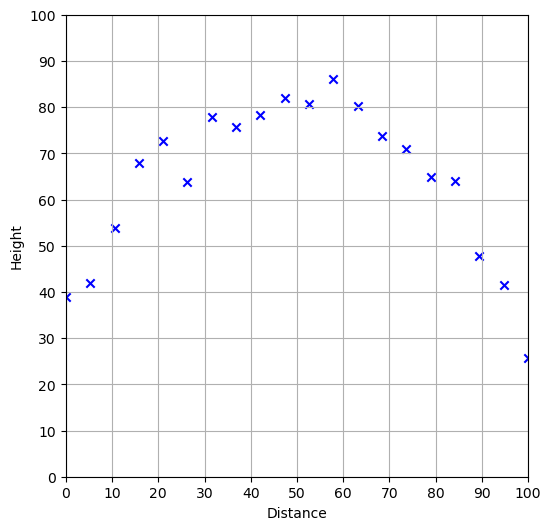

In [7]:
fig, ax = plt.subplots(figsize=(8, 6))
plt.scatter(x_data, y_data, marker = 'x', 
            color='blue', label="Data Points")
plt.xlabel('Distance')
plt.ylabel('Height')

# plt.legend()
plt.ylim(0,100)
plt.xlim(0,100)
plt.xticks(np.arange(0,110,10))
plt.yticks(np.arange(0,110,10))
plt.grid()
ax.set_aspect('equal', adjustable='box')
plt.show()

## 可视化2：散点和最优化抛物线

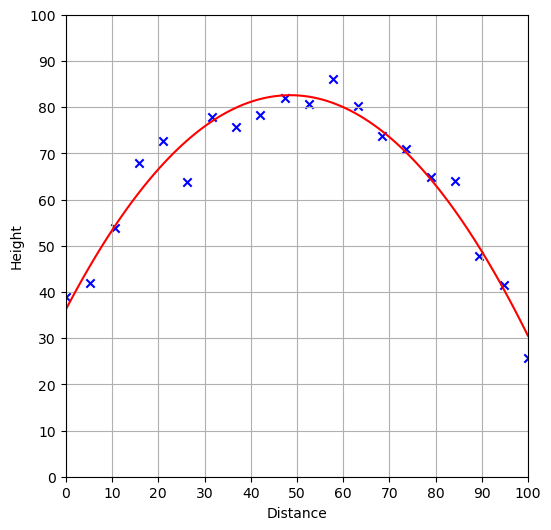

In [8]:
fig, ax = plt.subplots(figsize=(8, 6))
plt.scatter(x_data, y_data, marker = 'x', 
            color='blue', label="Data Points")
plt.plot(x_fit, y_fit, color='red', label="Optimized Parabola")
plt.xlabel('Distance')
plt.ylabel('Height')

# plt.legend()
plt.ylim(0,100)
plt.xlim(0,100)
plt.xticks(np.arange(0,110,10))
plt.yticks(np.arange(0,110,10))
plt.grid()
ax.set_aspect('equal', adjustable='box')
plt.show()

## 拟合的抛物线

In [9]:
y_data_predict = a_opt * x_data**2 + b_opt * x_data + c_opt

## 可视化3：最小二乘

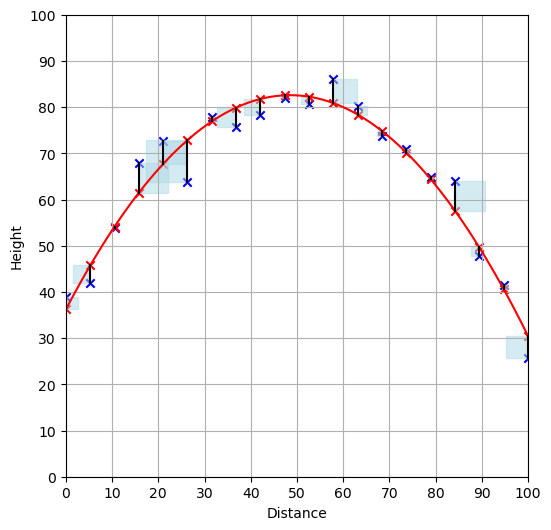

In [10]:
fig, ax = plt.subplots(figsize=(8, 6))
plt.scatter(x_data, y_data, marker = 'x', 
            color='blue', label="Data Points")

plt.scatter(x_data, y_data_predict, marker = 'x', 
            color='red', label="Data Points")

plt.plot(x_fit, y_fit, color='red', label="Optimized Parabola")

# 绘制正方形表示最小二乘
for x, y in zip(x_data, y_data):
    y_pred = a_opt * x**2 + b_opt * x + c_opt
    square_x = [x, x, x + (y - y_pred), x + (y - y_pred)]
    square_y = [y, y_pred, y_pred, y]
    plt.fill(square_x, square_y, color='lightblue', alpha=0.5)
    plt.plot((x,x),(y,y_pred),color = 'k')

plt.xlabel('Distance')
plt.ylabel('Height')

plt.ylim(0,100)
plt.xlim(0,100)
plt.xticks(np.arange(0,110,10))
plt.yticks(np.arange(0,110,10))
plt.grid()
ax.set_aspect('equal', adjustable='box')
plt.show()